<div style="background-color: rgba(238, 238, 238, 0.6); padding: 10px; margin-left: 80%"><span style="display: block; color: black; font-size: 24px; text-align: right; font-weight: bold; text-shadow: 2px 2px 4px #999999;">Team Mirka and Zygis<br><br></span><span style="display: block; color: black; text-align: right; font-weight: bold; text-shadow: 2px 2px 4px #999999;">Miroslava Slavikova<br>Zygimantas Jakubauskas<br></span></div>

<span style="color: blue;">

## Table of contents:
</span>

* [1. Getting familiar with the dataset](#second-bullet)
** [1.1. Data dictionary](#eight-bullet)
* [2. Exploratory data analysis](#third-bullet)
* [3. Data preparation](#fourth-bullet)
** [3.1. Analysis of Target variable](#12th-bullet)      
** [3.2. Encoding](#fifth-bullet)    
** [3.3. Imputing missing values](#sixth-bullet)        
** [3.4. Scaling](#seventh-bullet)        
** [3.4. Principal component analysis](#8th-bullet)  
* [4. Mashine Learning Models](#ninth-bullet)    
** [4.1. Naive Bayes](#10th-bullet)        
** [4.2. Random Forest](#11th-bullet) 
** [4.3. Logistic Regression](#13th-bullet)    
** [4.4. Desicion Tree](#14th-bullet) 
* [5. Cross validation techniques](#15th-bullet)  
** [5.1. Random Forest analysis](#16th-bullet)     
** [5.2. Desicion Tree analysis](#17th-bullet)      

In [1]:
# importing neseccary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore") 

<span style="color: blue;">

## 1. Getting familiar with the dataset <a class="anchor" id="second-bullet"></a>
    
</span>


In [3]:
# showing the dataset, including all the columns
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("air_data.csv")

In [5]:
df.head(10)

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   
5           5  39177    Male     Loyal Customer   16  Business travel   
6           6  79433  Female     Loyal Customer   77  Business travel   
7           7  97286  Female     Loyal Customer   43  Business travel   
8           8  27508    Male     Loyal Customer   47  Business travel   
9           9  62482  Female     Loyal Customer   46  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   
5       Eco              311                      3   
6  Business             3987                      5   
7  Business             2556                      2   
8       Eco              556                      5   
9  Business             1744                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   
5                                  3                       3              3   
6                                  5                       5              5   
7                                  2                       2              2   
8                                  2                       2              2   
9                                  2                       2              2   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               3                4             3                       5   
1               5                4             5                       4   
2               2                2             2                       2   
3               3                4             4                       1   
4               4                1             2                       2   
5               5                5             3                       5   
6               3                5             5                       5   
7               4                4             5                       4   
8               5                5             5                       5   
9               3                4             4                       4   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   
5                 4                 3                 1                1   
6                 5                 5                 5                4   
7                 4                 4                 4                5   
8                 2                 2                 5                3   
9                 4                 4                 4                5   

   Inflight service  Cleanliness  Departure Delay

In [6]:
df.shape

(129880, 25)

In [7]:
# checking unique values of all the columns
df.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

<span style="color: blue;">

### 1.1 Data dictionary <a class="anchor" id="eight-bullet"></a>
    
</span>

__Unnamed__ - Row number.

__id__ - Passengers ID.

__Gender__ - Passenger gender.

__Customer Type__ - Is passenger loyal or disloyal.

__Age__ - Passengers age.

__Type of Travel__ - Type of travel.

__Class__  - In-flight class.

__Flight distance__ - Distance travelled.

__Inflight wifi service__ - Passenger's satisfaction with inflight wifi service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Departure/Arrival time convenient__ - Passenger's satisfaction with arrival time convinience. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Ease of Online booking__ - Passenger's satisfaction with ease of online booking system. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Gate location__  - Passenger's satisfaction with gate location. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Food and drink__ - Passenger's satisfaction with in-flight food and drink. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Online boarding__ - Passenger's satisfaction with online check in system. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Seat comfort__ - Passenger's satisfaction with seat comfort. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Inflight entertainment__ - Passenger's satisfaction with in-flight entertainment. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__On-board service__ - Passenger's satisfaction with on-board service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Leg room service__  - Passenger's satisfaction with leg room service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Baggage handling__ - Passenger's satisfaction with baggage handling. There are 5 levels. 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Checkin service__ - Passenger's satisfaction with check-in service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Inflight service__ - Passenger's satisfaction with in-flight service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Cleanliness__ - Passenger's satisfaction with cleanliness of the plane. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfie

__Departure Delay in Minutes__ - Was the flight late to depart.

__Arrival Delay in Minutes__ - Was the flight late to arrive.

__satisfaction__ - Overall flight satisfaction.


<span style="color: blue;">

## 2. Exploratory data analysis <a class="anchor" id="third-bullet"></a>
    
</span>

In [8]:
# analysing leels of measurements of the variables
levels_of_measurement = pd.DataFrame({"Variable": ["id", "Gender", "Customer Type", "Age", "Type of Travel",
                                                   "Class", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 
                                                   "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
                                                  "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment",
                                                  "On-board service", "Leg room service", "Baggage handling", "Checkin service",
                                                  "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                                                  "Arrival Delay in Minutes", "satisfaction"], 
                                      'LoM': ["Nominal", "Nominal", "Nominal", "Ratio", "Nominal", "Nominal", "Ratio",
                                              "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal",
                                             "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal",
                                             "Ordinal", "Ordinal", "Ratio", "Ratio", "Nominal"]})
print (levels_of_measurement)

                             Variable      LoM
0                                  id  Nominal
1                              Gender  Nominal
2                       Customer Type  Nominal
3                                 Age    Ratio
4                      Type of Travel  Nominal
5                               Class  Nominal
6                     Flight Distance    Ratio
7               Inflight wifi service  Ordinal
8   Departure/Arrival time convenient  Ordinal
9              Ease of Online booking  Ordinal
10                      Gate location  Ordinal
11                     Food and drink  Ordinal
12                    Online boarding  Ordinal
13                      Gate location  Ordinal
14                     Food and drink  Ordinal
15                    Online boarding  Ordinal
16                       Seat comfort  Ordinal
17             Inflight entertainment  Ordinal
18                   On-board service  Ordinal
19                   Leg room service  Ordinal
20           

In [9]:
# checking for duplicates
df.duplicated().value_counts()

False    129880
dtype: int64

In [10]:
# checking missing values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [11]:
#getting a list of missing values, missing values represented as "nan"
mv = ["nan"]
df = pd.read_csv("air_data.csv", na_values=mv)
df.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               3                4             3                       5   
1               5                4             5                       4   
2               2                2             2                       2   
3               3                4             4                       1   
4               4                1             2                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied

In [12]:
missing_values = df["Arrival Delay in Minutes"].tolist()
missing_values

[44.0,
 0.0,
 0.0,
 6.0,
 20.0,
 0.0,
 0.0,
 65.0,
 0.0,
 14.0,
 19.0,
 7.0,
 0.0,
 113.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 49.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 13.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 68.0,
 1.0,
 70.0,
 12.0,
 68.0,
 10.0,
 0.0,
 0.0,
 4.0,
 177.0,
 3.0,
 55.0,
 90.0,
 0.0,
 2.0,
 4.0,
 0.0,
 0.0,
 32.0,
 0.0,
 0.0,
 0.0,
 46.0,
 0.0,
 0.0,
 4.0,
 0.0,
 57.0,
 0.0,
 3.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 47.0,
 40.0,
 0.0,
 0.0,
 0.0,
 24.0,
 0.0,
 0.0,
 27.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 52.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 17.0,
 0.0,
 11.0,
 34.0,
 0.0,
 95.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 66.0,
 113.0,
 2.0,
 13.0,
 0.0,
 7.0,
 24.0,
 0.0,
 0.0,
 2.0,
 6.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 40.0,
 11.0,
 8.0,
 17.0,
 0.0,
 10.0,
 86.0,
 0.0,
 0.0,
 8.0,
 0.0,
 88.0,
 0.0,
 46.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 178.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 78.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.0

In [13]:
nan_total = pd.isnull(df["Arrival Delay in Minutes"]).sum()
nan_total

393

In [14]:
# checking what type are the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [15]:
# removing unnesseccary variables that don't sontribute to the dataset
df = df.drop(columns = ["Unnamed: 0", "id"], axis = 1)
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              4               3                4   
1                       3              1               5                4   
2                       2              4               2                2   
3                       0              2               3                4   
4                       4              3               4                1   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             3                       5                 5                 5   
1             5                       4                 4                 4   
2             2                       2                 4                 1   
3             4                       1                 1                 1   
4             2                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          50                      44.0   
1                           0                       0.0   
2                           0                       0.0   
3                           0                       6.0   
4                           0                      20.0   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied

In [16]:
#getting statistical values of the continous variables. This includes categorical variables that are presented in numerical form.
df.describe()

Age  Flight Distance  Inflight wifi service  \
count  129880.000000    129880.000000          129880.000000   
mean       39.427957      1190.316392               2.728696   
std        15.119360       997.452477               1.329340   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       844.000000               3.000000   
75%        51.000000      1744.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  129880.000000   129880.000000    129880.000000  129880.000000   
mean        2.976925        3.204774         3.252633       3.441361   
std         1.278520        1.329933         1.350719       1.319289   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.358077          3.383023          3.350878   
std                  1.334049          1.287099          1.316252   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     129880.000000    129880.000000     129880.000000  129880.000000   
mean           3.632114         3.306267          3.642193       3.286326   
std            1.180025         1.266185          1.176669       1.313682   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               129880.000000             129487.000000  
mean                    14.713713                 15.091129  
std                     38.071126                 38.465650  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [17]:
# statistical values of categorical object type variables
df.describe(include=object)

Gender   Customer Type   Type of Travel     Class  \
count   129880          129880           129880    129880   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     65899          106100            89693     62160   

                   satisfaction  
count                    129880  
unique                        2  
top     neutral or dissatisfied  
freq                      73452

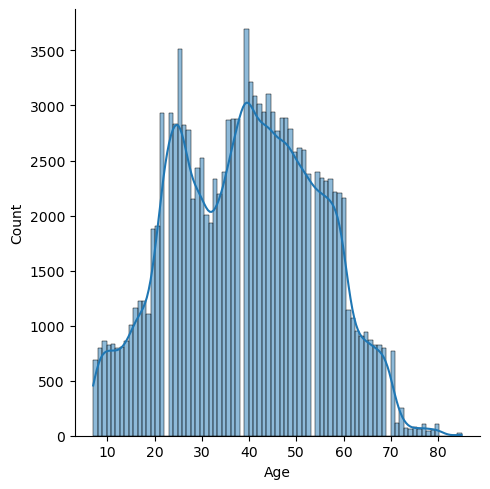

In [18]:
# plotting variable "Age"
sns.displot(df["Age"], kde = True);

In [19]:
# checking skewness of "Age"
df["Age"].skew()

-0.003606211745335888

In [20]:
# checking skewness of "Arrival Delay in Minutes"
df["Arrival Delay in Minutes"].skew()

6.670124610533305

In [21]:
# checking skewness of "Departure Delay in Minutes"
df["Departure Delay in Minutes"].skew()

6.82198031017346

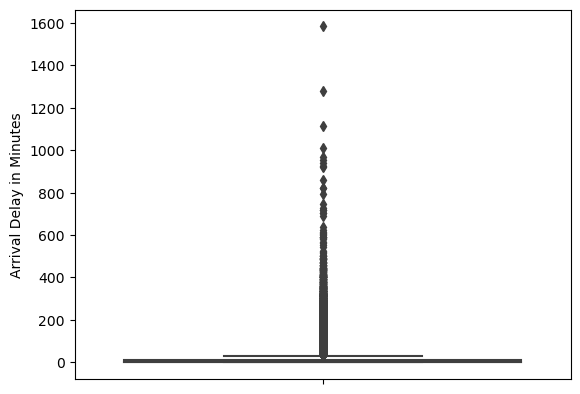

In [22]:
# boxplot of "Arrival Delay in Minutes"
sns.boxplot(y="Arrival Delay in Minutes", data=df);

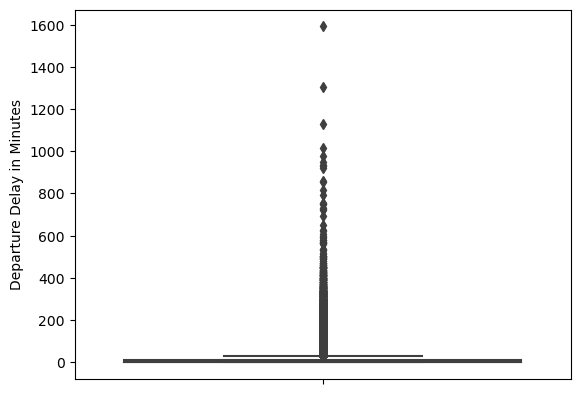

In [23]:
# boxplot of "Departure Delay in Minutes"
sns.boxplot(y="Departure Delay in Minutes", data=df);

In [24]:
# statistical values of variable "Flight Distance"
df["Flight Distance"].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

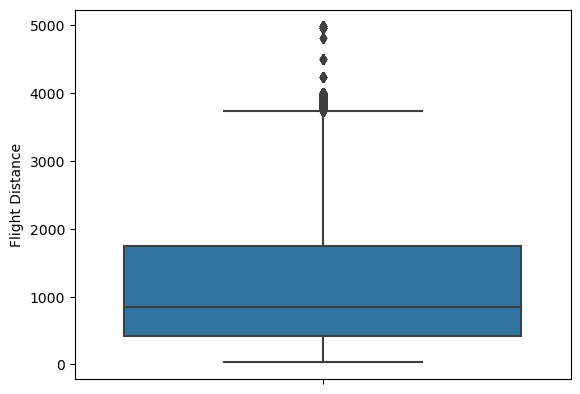

In [25]:
# Boxplot of "Flight Distance"
sns.boxplot(y="Flight Distance", data=df);

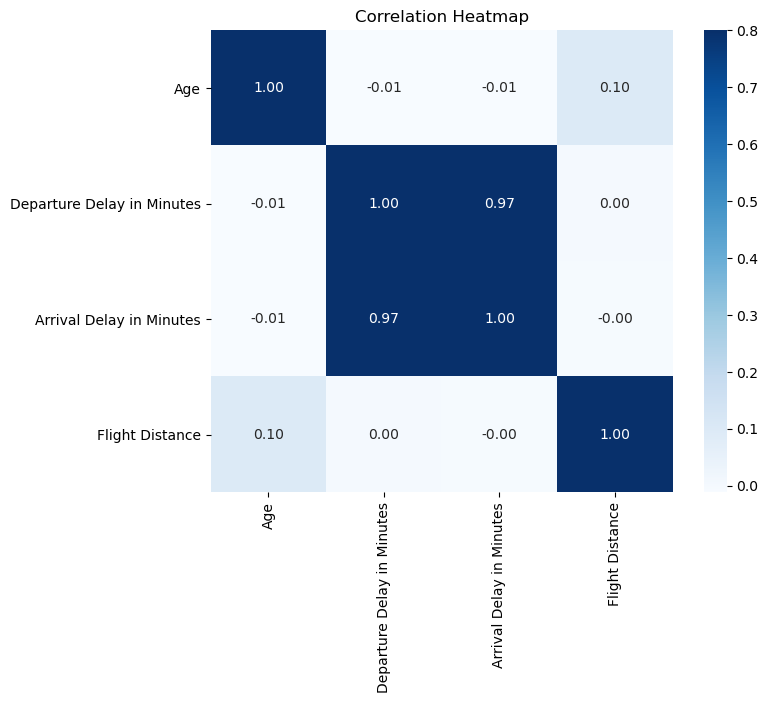

In [26]:
# plotting correlation heatmap of continous data
cont_variables = ["Age", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance"]
heatmap = df[cont_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, annot=True, fmt=".2f", cmap="Blues", vmax=.8, square=True)
plt.title('Correlation Heatmap')
plt.show()

<span style="color: blue;">

## 3. Data preparation <a class="anchor" id="fourth-bullet"></a>
    
</span>

<span style="color: blue;">

### 3.1 Analysis of Target variable <a class="anchor" id="12th-bullet"></a>
    
</span>

In [27]:
# Target variable is "satisfaction". Counting values of "satisfaction"
df["satisfaction"].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

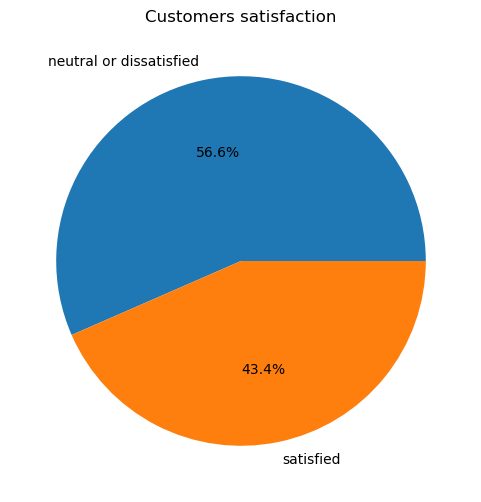

In [28]:
# piechart of "satisfaction" values distribution
plt.figure(figsize=(6, 6))  
plt.pie(df["satisfaction"].value_counts(), labels=df["satisfaction"].value_counts().index, autopct='%1.1f%%')
plt.title("Customers satisfaction")
plt.show()

In [29]:
# Giving values of 0 and 1 to our target variable.
df["satisfaction"] = df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})

<span style="color: blue;">

### 3.2 Encoding <a class="anchor" id="fifth-bullet"></a>
    
</span>

In [30]:
# changing type of variables from integer to object 
df = df.astype({"Inflight wifi service":'string'})
df["Inflight wifi service"] = df["Inflight wifi service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Departure/Arrival time convenient":'string'})
df["Departure/Arrival time convenient"] = df["Departure/Arrival time convenient"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Ease of Online booking":'string'})
df["Ease of Online booking"] = df["Ease of Online booking"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Gate location":'string'})
df["Gate location"] = df["Gate location"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Food and drink":'string'})
df["Food and drink"] = df["Food and drink"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Online boarding":'string'})
df["Online boarding"] = df["Online boarding"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Seat comfort":'string'})
df["Seat comfort"] = df["Seat comfort"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Inflight entertainment":'string'})
df["Inflight entertainment"] = df["Inflight entertainment"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"On-board service":'string'})
df["On-board service"] = df["On-board service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Leg room service":'string'})
df["Leg room service"] = df["Leg room service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Baggage handling":'string'})
df["Baggage handling"] = df["Baggage handling"].replace(["1", "2", "3", "4", "5"], ["Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Checkin service":'string'})
df["Checkin service"] = df["Checkin service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Inflight service":'string'})
df["Inflight service"] = df["Inflight service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Cleanliness":'string'})
df["Cleanliness"] = df["Cleanliness"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

  Inflight wifi service Departure/Arrival time convenient  \
0        Very satisfied                         Satisfied   
1     Very dissatisfied                 Very dissatisfied   
2          Dissatisfied                        No opinion   
3            No opinion                        No opinion   
4          Dissatisfied                           Neutral   

  Ease of Online booking      Gate location  Food and drink  \
0                Neutral          Satisfied         Neutral   
1                Neutral  Very dissatisfied  Very satisfied   
2           Dissatisfied          Satisfied    Dissatisfied   
3             No opinion       Dissatisfied         Neutral   
4              Satisfied            Neutral       Satisfied   

     Online boarding    Seat comfort Inflight entertainment  \
0          Satisfied         Neutral         Very satisfied   
1          Satisfied  Very satisfied              Satisfied   
2       Dissatisfied    Dissatisfied           Dissatisfied   
3          Satisfied       Satisfied      Very dissatisfied   
4  Very dissatisfied    Dissatisfied           Dissatisfied   

    On-board service   Leg room service   Baggage handling Checkin service  \
0     Very satisfied     Very satisfied     Very satisfied    Dissatisfied   
1          Satisfied          Satisfied          Satisfied         Neutral   
2          Satisfied  Very dissatisfied            Neutral    Dissatisfied   
3  Very dissatisfied  Very dissatisfied  Very dissatisfied         Neutral   
4       Dissatisfied       Dissatisfied       Dissatisfied       Satisfied   

    Inflight service     Cleanliness  Departure Delay in Minutes  \
0     Very satisfied  Very satisfied                          50   
1          Satisfied  Very satisfied                           0   
2       Dissatisfied    Dissatisfied                           0   
3  Very dissatisfied       Satisfied                           0   
4       Dissatisfied       Satisfied                           0   

   Arrival Delay in Minutes  satisfaction  
0                      44.0             1  
1                       0.0             1  
2                       0.0             0  
3                       6.0             1  
4                      20.0             1

In [31]:
# encoding categorical variables with pandas dummies function
df_encoded = pd.get_dummies(data=df,drop_first=True)
df_encoded

Age  Flight Distance  Departure Delay in Minutes  \
0        52              160                          50   
1        36             2863                           0   
2        20              192                           0   
3        44             3377                           0   
4        49             1182                           0   
...     ...              ...                         ...   
129875   23              192                           3   
129876   49             2347                           0   
129877   30             1995                           7   
129878   22             1000                           0   
129879   27             1723                           0   

        Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                           44.0             1            0   
1                            0.0             1            0   
2                            0.0             0            1   
3                            6.0             1            1   
4                           20.0             1            0   
...                          ...           ...          ...   
129875                       0.0             0            0   
129876                       0.0             1            1   
129877                      14.0             0            1   
129878                       0.0             0            0   
129879                       0.0             0            1   

        Customer Type_disloyal Customer  Type of Travel_Personal Travel  \
0                                     0                               0   
1                                     0                               0   
2                                     1                               0   
3                                     0                               0   
4                                     0                               0   
...                                 ...                             ...   
129875                                1                               0   
129876                                0                               0   
129877                                1                               0   
129878                                1                               0   
129879                                0                               0   

        Class_Eco  Class_Eco Plus  Inflight wifi service_Neutral  \
0               1               0                              0   
1               0               0                              0   
2               1               0                              0   
3               0               0                              0   
4               1               0                              0   
...           ...             ...                            ...   
129875          1               0                              0   
129876          0               0                              0   
129877          0               0                              0   
129878          1               0                              0   
129879          0               0                              0   

        Inflight wifi service_No opinion  Inflight wifi service_Satisfied  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      1                                0   
4                                      0                                0   
...                                  ...                              ...   
129875                                 0                                0   
129876                                 0                                1   
129877                                 0                                0   
129878                                 0  

<span style="color: blue;">

### 3.3 Imputing missing values <a class="anchor" id="sixth-bullet"></a>
    
</span>

In [32]:
# checking for missing values
df_encoded.isnull().sum()

Age                                0
Flight Distance                    0
Departure Delay in Minutes         0
Arrival Delay in Minutes         393
satisfaction                       0
                                ... 
Cleanliness_Neutral                0
Cleanliness_No opinion             0
Cleanliness_Satisfied              0
Cleanliness_Very dissatisfied      0
Cleanliness_Very satisfied         0
Length: 79, dtype: int64

In [33]:
# importing SimpleImputer
from sklearn.impute import SimpleImputer

In [34]:
# setting imputer strategy, which is median
imputer = SimpleImputer(strategy="median")

In [35]:
# imputing missing values
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [36]:
# checking if missing values are filled
df_encoded.isnull().sum()

Age                              0
Flight Distance                  0
Departure Delay in Minutes       0
Arrival Delay in Minutes         0
satisfaction                     0
                                ..
Cleanliness_Neutral              0
Cleanliness_No opinion           0
Cleanliness_Satisfied            0
Cleanliness_Very dissatisfied    0
Cleanliness_Very satisfied       0
Length: 79, dtype: int64

In [37]:
df_encoded.shape

(129880, 79)

<span style="color: blue;">

### 3.3 Scaling <a class="anchor" id="seventh-bullet"></a>
    
</span>

In [38]:
# import relevant library for scaling
from sklearn import preprocessing

In [39]:
# 2 columns are encoded using L2 normalisation
departure = df_encoded[["Departure Delay in Minutes"]] 
arrival = df_encoded[["Arrival Delay in Minutes"]] 

departure_normalized = preprocessing.normalize(departure, axis=0)
arrival_normalized = preprocessing.normalize(arrival, axis=0)

df_encoded["Departure Delay in Minutes"] = departure_normalized
df_encoded["Arrival Delay in Minutes"] = arrival_normalized

df_encoded.head()

Age  Flight Distance  Departure Delay in Minutes  \
0  52.0            160.0                    0.003399   
1  36.0           2863.0                    0.000000   
2  20.0            192.0                    0.000000   
3  44.0           3377.0                    0.000000   
4  49.0           1182.0                    0.000000   

   Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                  0.002959           1.0          0.0   
1                  0.000000           1.0          0.0   
2                  0.000000           0.0          1.0   
3                  0.000404           1.0          1.0   
4                  0.001345           1.0          0.0   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                              0.0                             0.0        1.0   
1                              0.0                             0.0        0.0   
2                              1.0                             0.0        1.0   
3                              0.0                             0.0        0.0   
4                              0.0                             0.0        1.0   

   Class_Eco Plus  Inflight wifi service_Neutral  \
0             0.0                            0.0   
1             0.0                            0.0   
2             0.0                            0.0   
3             0.0                            0.0   
4             0.0                            0.0   

   Inflight wifi service_No opinion  Inflight wifi service_Satisfied  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               1.0                              0.0   
4                               0.0                              0.0   

   Inflight wifi service_Very dissatisfied  \
0                                      0.0   
1                                      1.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Inflight wifi service_Very satisfied  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   Departure/Arrival time convenient_Neutral  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   

   Departure/Arrival time convenient_No opinion  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           0.0   

   Departure/Arrival time convenient_Satisfied  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Departure/Arrival time convenient_Very dissatisfied  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Departure/Arrival time convenient_Very satisfied  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                           

In [40]:
# for the scaling of "Flight Distance" importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [41]:
df_encoded.head()

Age  Flight Distance  Departure Delay in Minutes  \
0  52.0            160.0                    0.003399   
1  36.0           2863.0                    0.000000   
2  20.0            192.0                    0.000000   
3  44.0           3377.0                    0.000000   
4  49.0           1182.0                    0.000000   

   Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                  0.002959           1.0          0.0   
1                  0.000000           1.0          0.0   
2                  0.000000           0.0          1.0   
3                  0.000404           1.0          1.0   
4                  0.001345           1.0          0.0   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                              0.0                             0.0        1.0   
1                              0.0                             0.0        0.0   
2                              1.0                             0.0        1.0   
3                              0.0                             0.0        0.0   
4                              0.0                             0.0        1.0   

   Class_Eco Plus  Inflight wifi service_Neutral  \
0             0.0                            0.0   
1             0.0                            0.0   
2             0.0                            0.0   
3             0.0                            0.0   
4             0.0                            0.0   

   Inflight wifi service_No opinion  Inflight wifi service_Satisfied  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               1.0                              0.0   
4                               0.0                              0.0   

   Inflight wifi service_Very dissatisfied  \
0                                      0.0   
1                                      1.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Inflight wifi service_Very satisfied  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   Departure/Arrival time convenient_Neutral  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   

   Departure/Arrival time convenient_No opinion  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           0.0   

   Departure/Arrival time convenient_Satisfied  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Departure/Arrival time convenient_Very dissatisfied  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Departure/Arrival time convenient_Very satisfied  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                           

In [42]:
import sklearn.preprocessing as preproc

In [43]:
# encoding "Flight Distance"
df_encoded["Flight Distance"]=preproc.minmax_scale(df_encoded[["Flight Distance"]])

In [44]:
df_encoded.head()

Age  Flight Distance  Departure Delay in Minutes  \
0  52.0         0.026050                    0.003399   
1  36.0         0.571890                    0.000000   
2  20.0         0.032512                    0.000000   
3  44.0         0.675687                    0.000000   
4  49.0         0.232431                    0.000000   

   Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                  0.002959           1.0          0.0   
1                  0.000000           1.0          0.0   
2                  0.000000           0.0          1.0   
3                  0.000404           1.0          1.0   
4                  0.001345           1.0          0.0   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                              0.0                             0.0        1.0   
1                              0.0                             0.0        0.0   
2                              1.0                             0.0        1.0   
3                              0.0                             0.0        0.0   
4                              0.0                             0.0        1.0   

   Class_Eco Plus  Inflight wifi service_Neutral  \
0             0.0                            0.0   
1             0.0                            0.0   
2             0.0                            0.0   
3             0.0                            0.0   
4             0.0                            0.0   

   Inflight wifi service_No opinion  Inflight wifi service_Satisfied  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               1.0                              0.0   
4                               0.0                              0.0   

   Inflight wifi service_Very dissatisfied  \
0                                      0.0   
1                                      1.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Inflight wifi service_Very satisfied  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   Departure/Arrival time convenient_Neutral  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   

   Departure/Arrival time convenient_No opinion  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           0.0   

   Departure/Arrival time convenient_Satisfied  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Departure/Arrival time convenient_Very dissatisfied  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Departure/Arrival time convenient_Very satisfied  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                           

<span style="color: blue;">

## 4. Mashine Learning Models <a class="anchor" id="ninth-bullet"></a>
    
</span>

In [45]:
# setting X and y for target variable
X = df_encoded.drop("satisfaction", axis=1) 
y = df_encoded["satisfaction"]

In [46]:
# importing train_test split and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [47]:
# running the models at 0.2 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

Age  Flight Distance  Departure Delay in Minutes  \
0  52.0         0.026050                    0.003399   
1  36.0         0.571890                    0.000000   
2  20.0         0.032512                    0.000000   
3  44.0         0.675687                    0.000000   
4  49.0         0.232431                    0.000000   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0                  0.002959          0.0                              0.0   
1                  0.000000          0.0                              0.0   
2                  0.000000          1.0                              1.0   
3                  0.000404          1.0                              0.0   
4                  0.001345          0.0                              0.0   

   Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  \
0                             0.0        1.0             0.0   
1                             0.0        0.0             0.0   
2                             0.0        1.0             0.0   
3                             0.0        0.0             0.0   
4                             0.0        1.0             0.0   

   Inflight wifi service_Neutral  Inflight wifi service_No opinion  \
0                            0.0                               0.0   
1                            0.0                               0.0   
2                            0.0                               0.0   
3                            0.0                               1.0   
4                            0.0                               0.0   

   Inflight wifi service_Satisfied  Inflight wifi service_Very dissatisfied  \
0                              0.0                                      0.0   
1                              0.0                                      1.0   
2                              0.0                                      0.0   
3                              0.0                                      0.0   
4                              0.0                                      0.0   

   Inflight wifi service_Very satisfied  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   Departure/Arrival time convenient_Neutral  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   

   Departure/Arrival time convenient_No opinion  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           0.0   

   Departure/Arrival time convenient_Satisfied  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Departure/Arrival time convenient_Very dissatisfied  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Departure/Arrival time convenient_Very satisfied  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Ease of Online booking_Neutral  Ease of Online booking_No opinion  \
0              

<span style="color: blue;">

### 4.1 Naive Bayes <a class="anchor" id="10th-bullet"></a>
    
</span>

In [48]:
# importing Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [49]:
# setting up Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [50]:
# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_nb = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
cm_bayes=cm
print("Confusion Matrix using Naive Bayes model:")
print(cm_bayes)
print("Accuracy is:", accuracy_nb)

Confusion Matrix using Naive Bayes model:
[[ 9109  5625]
 [  605 10637]]
Accuracy is: 0.7601632275947028


<span style="color: blue;">

### 4.2 Random Forest <a class="anchor" id="11th-bullet"></a>
    
</span>

In [51]:
# importing Random Forest model and calculating confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [52]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm_rf = cm
print("Confusion Matrix using Random Forest:")
print(cm_rf)
print("Accuracy is:", accuracy_rf)

Confusion Matrix using Random Forest:
[[14462   272]
 [  736 10506]]
Accuracy is: 0.9611949491838621


<span style="color: blue;">

### 4.3 Logistic Regression <a class="anchor" id="13th-bullet"></a>
    
</span>

In [54]:
# importing Logistic Regression model and calculating confusion matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [55]:
cm_lr = confusion_matrix(y_test, y_pred)
accuracy_lr = (cm_lr[0, 0] + cm_lr[1, 1]) / (cm_lr[0, 0] + cm_lr[1, 1] + cm_lr[0, 1] + cm_lr[1, 0])
print("Confusion Matrix using Linear Regression model:")
print(cm_lr)
print("Accuracy is:", accuracy_lr)

Confusion Matrix using Linear Regression model:
[[14038   696]
 [ 1039 10203]]
Accuracy is: 0.9332075762242069


<span style="color: blue;">

### 4.4 Desicion Tree <a class="anchor" id="14th-bullet"></a>
    
</span>

In [56]:
# importing Decision Tree model and calculating confusion matrix
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
cm_dt = confusion_matrix(y_test, y_pred)
accuracy_dt = (cm_dt[0, 0] + cm_dt[1, 1]) / (cm_dt[0, 0] + cm_dt[1, 1] + cm_dt[0, 1] + cm_dt[1, 0])
print("Confusion Matrix using Desicion Tree model:")
print(cm_dt)
print("Accuracy is:", accuracy_dt)

Confusion Matrix using Desicion Tree model:
[[14025   709]
 [  678 10564]]
Accuracy is: 0.9466045580535879


In [58]:
# comparing the results of all models
accuracy_list = [accuracy_nb, accuracy_rf, accuracy_lr, accuracy_dt]  
true_positives_list = [cm_bayes[0, 0], cm_rf[0, 0], cm_lr[0, 0], cm_dt[0, 0]]  
false_positives_list = [cm_bayes[1, 0], cm_rf[1, 0], cm_lr[1, 0], cm_dt[1, 0]]  
true_negatives_list = [cm_bayes[1, 1], cm_rf[1, 1], cm_lr[1, 1], cm_dt[1, 1]]  
false_negatives_list = [cm_bayes[0, 1], cm_rf[0, 1], cm_lr[0, 1], cm_dt[0, 1]] 
models = ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree']
subtable = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_list,
    "True Positive (Correct)": true_positives_list,
    "False Positive (Incorrect)": false_positives_list,
    "True Negative (Correct)": true_negatives_list,
    "False Negative (Incorrect)": false_negatives_list})
subtable.head()

Model  Accuracy  True Positive (Correct)  \
0          Naive Bayes  0.760163                     9109   
1        Random Forest  0.961195                    14462   
2  Logistic Regression  0.933208                    14038   
3        Decision Tree  0.946605                    14025   

   False Positive (Incorrect)  True Negative (Correct)  \
0                         605                    10637   
1                         736                    10506   
2                        1039                    10203   
3                         678                    10564   

   False Negative (Incorrect)  
0                        5625  
1                         272  
2                         696  
3                         709

<span style="color: blue;">

### 5. Cross validation techniques <a class="anchor" id="15th-bullet"></a>
    
</span>

In [59]:
# importing cross_val_score
from sklearn.model_selection import cross_val_score

<span style="color: blue;">

### 5.1. Random Forest Analysis <a class="anchor" id="16th-bullet"></a>
    
</span>

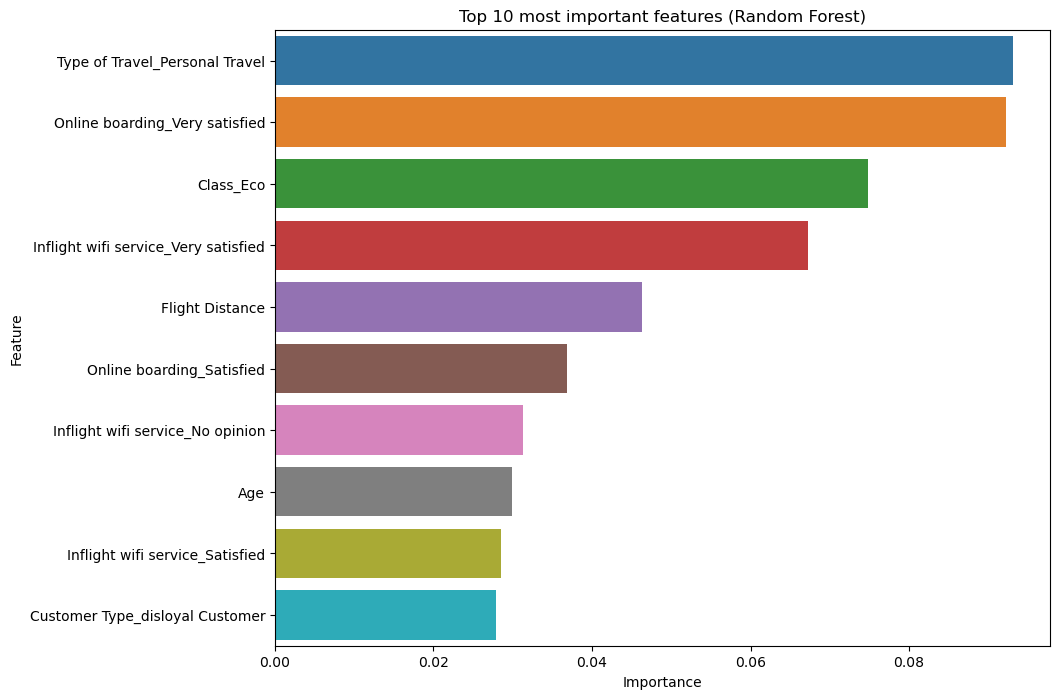

In [60]:
# plotting Random Forest importances
importances = rf_classifier.feature_importances_
df_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances})
figure = df_imp.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=figure, x="Importance", y="Feature")
plt.title("Top 10 most important features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [61]:
# setting test size at 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# running model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf20 = accuracy_score(y_test, y_pred)

In [63]:
# calculating confusion matrix at 0.2 test size
cm = confusion_matrix(y_test, y_pred)
cm_rf20 = cm
print("Confusion Matrix using Random Forest:")
print(cm_rf20)
print("Accuracy is:", accuracy_rf20)

Confusion Matrix using Random Forest:
[[14462   272]
 [  736 10506]]
Accuracy is: 0.9611949491838621


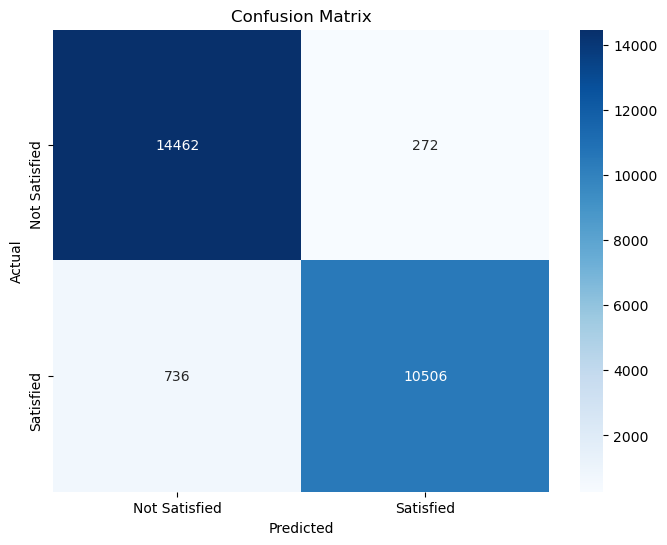

In [64]:
# plotting confusion matrix at best performing 0.2 test size
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [65]:
# setting test size at 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [66]:
# running model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf10 = accuracy_score(y_test, y_pred)

In [67]:
# calculating confusion matrix at 0.1 test size
cm = confusion_matrix(y_test, y_pred)
cm_rf10 = cm
print("Confusion Matrix using Random Forest:")
print(cm_rf10)
print("Accuracy is:", accuracy_rf10)

Confusion Matrix using Random Forest:
[[7225  136]
 [ 373 5254]]
Accuracy is: 0.9608099784416384


In [68]:
# setting test size at 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
#running model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf30 = accuracy_score(y_test, y_pred)

In [70]:
# calculating confusion matrix at 0.3 test size
cm = confusion_matrix(y_test, y_pred)
cm_rf30 = cm
print("Confusion Matrix using Random Forest:")
print(cm_rf30)
print("Accuracy is:", accuracy_rf30)

Confusion Matrix using Random Forest:
[[21588   450]
 [ 1079 15847]]
Accuracy is: 0.9607586490093419


In [71]:
# creating accuracies subtable at different test sizes
accuracies = [accuracy_rf10, accuracy_rf20, accuracy_rf30]  
true_positives_list = [cm_rf10[0, 0], cm_rf20[0, 0], cm_rf30[0, 0]]  
false_positives_list = [cm_rf10[1, 0], cm_rf20[1, 0], cm_rf30[1, 0]]  
true_negatives_list = [cm_rf10[1, 1], cm_rf20[1, 1], cm_rf30[1, 1]]  
false_negatives_list = [cm_rf10[0, 1], cm_rf20[0, 1], cm_rf30[0, 1]] 
test_size = ["10%", "20%", "30%"]
subtable = pd.DataFrame({
    "Test Size": test_size,
    'Accuracy': accuracies,
    "True Positive (Correct)": true_positives_list,
    "False Positive (Incorrect)": false_positives_list,
    "True Negative (Correct)": true_negatives_list,
    "False Negative (Incorrect)": false_negatives_list})
subtable.head()

Test Size  Accuracy  True Positive (Correct)  False Positive (Incorrect)  \
0       10%  0.960810                     7225                         373   
1       20%  0.961195                    14462                         736   
2       30%  0.960759                    21588                        1079   

   True Negative (Correct)  False Negative (Incorrect)  
0                     5254                         136  
1                    10506                         272  
2                    15847                         450

In [72]:
# setting test size at 20% for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# calculating cross validation scores at 10 folds
cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.94379752 0.94572226 0.94851314 0.94620345 0.95033686 0.94417709
 0.94369586 0.94225217 0.94552454 0.94889317] 
 Mean Accuracy : 0.9459116050398615 
Standard Deviation : 0.002475688428576563


In [74]:
# calculating cross validation scores at 20 folds
cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.94572748 0.94649731 0.94707467 0.94861432 0.95264678 0.94571704
 0.94456208 0.94879692 0.9545717  0.94687199 0.9493744  0.94706449
 0.94263715 0.94918191 0.94475457 0.94706449 0.94379211 0.94879692
 0.94821944 0.94898941] 
 Mean Accuracy : 0.9475477582889333 
Standard Deviation : 0.0027566451334687576


<span style="color: blue;">

### 5.2. Desicion Tree analysis <a class="anchor" id="17th-bullet"></a>
    
</span>

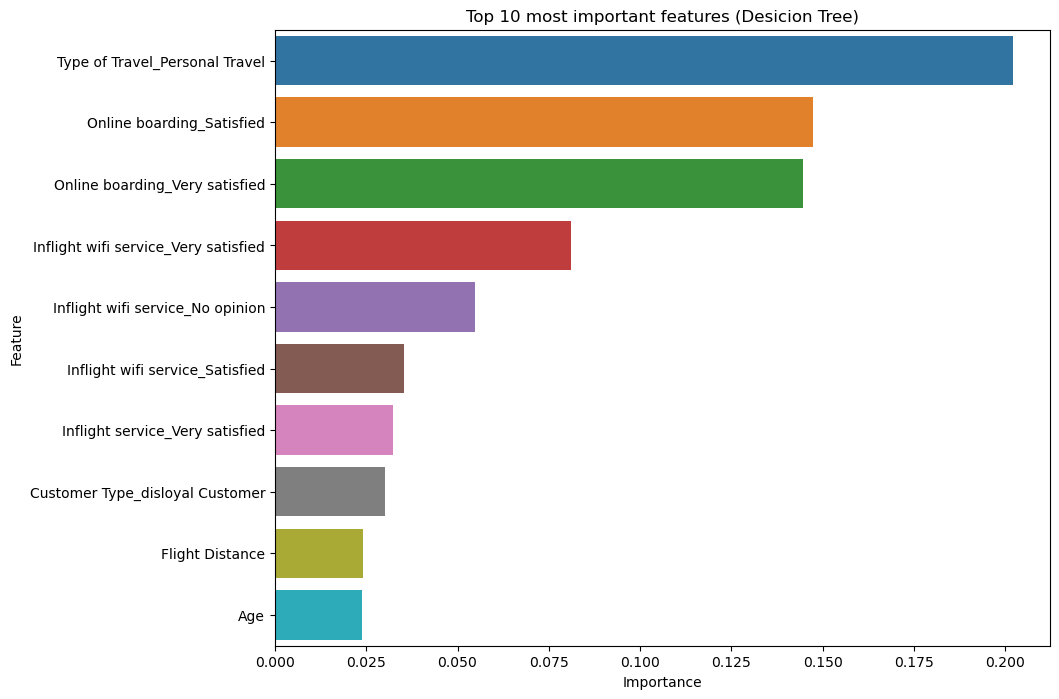

In [75]:
# plotting Desicion Tree importances
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
importances = dt_classifier.feature_importances_
df_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances})
figure = df_imp.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=figure, x="Importance", y="Feature")
plt.title("Top 10 most important features (Desicion Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [76]:
# setting test size at 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [77]:
# running model
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [78]:
# calculating confusion matrix at 0.1 test size
cm_dt10 = confusion_matrix(y_test, y_pred)
accuracy_dt10 = (cm_dt[0, 0] + cm_dt[1, 1]) / (cm_dt[0, 0] + cm_dt[1, 1] + cm_dt[0, 1] + cm_dt[1, 0])
print("Confusion Matrix using Desicion Tree model:")
print(cm_dt10)
print("Accuracy is:", accuracy_dt10)

Confusion Matrix using Desicion Tree model:
[[7004  357]
 [ 334 5293]]
Accuracy is: 0.9466045580535879


In [80]:
# setting test size at 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# running model
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [82]:
# calculating confusion matrix at 0.2 test size
cm_dt20 = confusion_matrix(y_test, y_pred)
accuracy_dt20 = (cm_dt20[0, 0] + cm_dt20[1, 1]) / (cm_dt20[0, 0] + cm_dt20[1, 1] + cm_dt20[0, 1] + cm_dt20[1, 0])
print("Confusion Matrix using Desicion Tree model:")
print(cm_dt20)
print("Accuracy is:", accuracy_dt20)

Confusion Matrix using Desicion Tree model:
[[14075   659]
 [  678 10564]]
Accuracy is: 0.9485294117647058


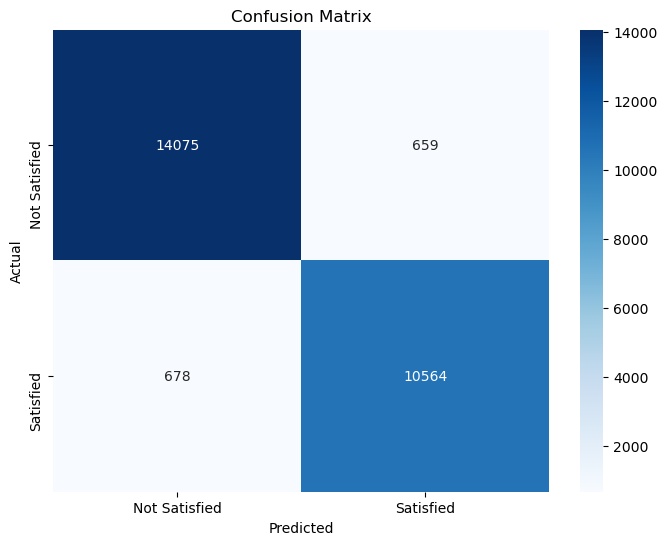

In [83]:
# plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# setting test size at 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# running model
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [86]:
# calculating confusion matrix at 0.3 test size
cm_dt30 = confusion_matrix(y_test, y_pred)
accuracy_dt30 = (cm_dt30[0, 0] + cm_dt30[1, 1]) / (cm_dt30[0, 0] + cm_dt30[1, 1] + cm_dt30[0, 1] + cm_dt30[1, 0])
print("Confusion Matrix using Desicion Tree model:")
print(cm_dt30)
print("Accuracy is:", accuracy_dt30)

Confusion Matrix using Desicion Tree model:
[[20948  1090]
 [  959 15967]]
Accuracy is: 0.9474129966122574


In [87]:
# creating accuracies subtable
accuracies = [accuracy_dt10, accuracy_dt20, accuracy_dt30]  
true_positives_list = [cm_dt10[0, 0], cm_dt20[0, 0], cm_dt30[0, 0]]  
false_positives_list = [cm_dt10[1, 0], cm_dt20[1, 0], cm_dt30[1, 0]]  
true_negatives_list = [cm_dt10[1, 1], cm_dt20[1, 1], cm_dt30[1, 1]]  
false_negatives_list = [cm_dt10[0, 1], cm_dt20[0, 1], cm_dt30[0, 1]] 
test_size = ["10%", "20%", "30%"]
subtable = pd.DataFrame({
    "Test Size": test_size,
    'Accuracy': accuracies,
    "True Positive (Correct)": true_positives_list,
    "False Positive (Incorrect)": false_positives_list,
    "True Negative (Correct)": true_negatives_list,
    "False Negative (Incorrect)": false_negatives_list})
subtable.head()

Test Size  Accuracy  True Positive (Correct)  False Positive (Incorrect)  \
0       10%  0.946605                     7004                         334   
1       20%  0.948529                    14075                         678   
2       30%  0.947413                    20948                         959   

   True Negative (Correct)  False Negative (Incorrect)  
0                     5293                         357  
1                    10564                         659  
2                    15967                        1090

In [97]:
# setting test size at 20% (best performing test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# calculating cross validation scores at 10 folds
cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.9442787  0.94658839 0.94870561 0.94514484 0.9493744  0.94571704
 0.9452358  0.94263715 0.94562079 0.95091434] 
 Mean Accuracy : 0.9464217062796534 
Standard Deviation : 0.0023924103019081545


In [99]:
# calculating cross validation scores at 20 folds
cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.94649731 0.94668976 0.94553503 0.94822941 0.95283927 0.94590953
 0.94706449 0.9466795  0.95303176 0.94706449 0.94725698 0.94359962
 0.94456208 0.94898941 0.94417709 0.94687199 0.94379211 0.94841193
 0.94802695 0.94744947] 
 Mean Accuracy : 0.9471339080702487 
Standard Deviation : 0.0024339589506041054


## The End